# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [1]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt

#### Import ratings data

In [15]:
df = pd.read_csv('ratings.csv', index_col='movieId')
df

,userId,rating,timestamp
movieId,,,
1,1,4.0,964982703
3,1,4.0,964981247
6,1,4.0,964982224
47,1,5.0,964983815
50,1,5.0,964982931
...,...,...,...
166534,610,4.0,1493848402
168248,610,5.0,1493850091
168250,610,5.0,1494273047


In [16]:
col = df.columns
col

Index(['userId', 'rating', 'timestamp'], dtype='object')

### Look at movies watched by user 2

User 2 has watched and rated 58 movies

In [19]:
two_df = df[df['userId'] == 2]
two_df

,userId,rating,timestamp
movieId,,,
318,2,3.0,1445714835
333,2,4.0,1445715029
1704,2,4.5,1445715228
3578,2,4.0,1445714885
6874,2,4.0,1445714952
8798,2,3.5,1445714960
46970,2,4.0,1445715013
48516,2,4.0,1445715064
58559,2,4.5,1445715141


### Plot

<Axes: xlabel='rating'>

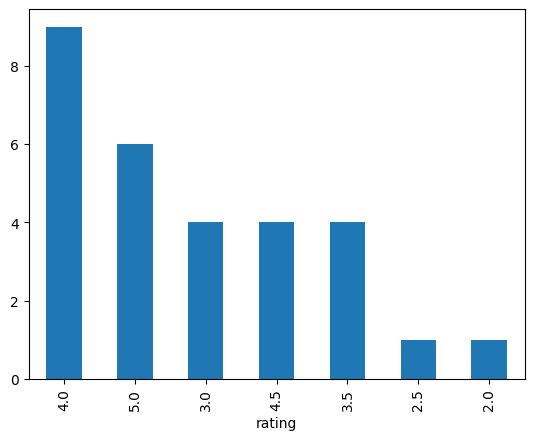

In [20]:
two_df['rating'].value_counts().plot.bar()

### User 2 top movies

#### Importing movies file

In [21]:
df2 = pd.read_csv('movies.csv', index_col='movieId')
df2

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


#### Merging the two datasets and sorting by rating descending.

We can see some of user 2's top movies include 	The Jinx: The Life and Deaths of Robert Durst, Mad Max: Fury Road, and The Wolf of Wall Street

In [35]:
two_df.merge(df2, how='inner', on='movieId', sort='True').sort_values(by='rating', ascending=False)

,userId,rating,timestamp,title,genres
movieId,,,,,
131724,2,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary
122882,2,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
106782,2,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
89774,2,5.0,1445715189,Warrior (2011),Drama
60756,2,5.0,1445714980,Step Brothers (2008),Comedy
80906,2,5.0,1445715172,Inside Job (2010),Documentary
1704,2,4.5,1445715228,Good Will Hunting (1997),Drama|Romance
58559,2,4.5,1445715141,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX
68157,2,4.5,1445715154,Inglourious Basterds (2009),Action|Drama|War


### Most similar user in the movielens dataset to user 2

In [47]:
wide = ratings.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
cor = wide.T.corr()

In [49]:
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


#### Using Pearson, user 341 is one of the most like user 2

In [51]:
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

In [52]:
wide.loc[2].notna().equals(wide.loc[341].notna())

False

In [53]:
rated_5_by_341_not_watched_by_2 = (wide.loc[341] == 5) & (wide.loc[2].isna())
print(wide.loc[2][rated_5_by_341_not_watched_by_2])
print(wide.loc[341][rated_5_by_341_not_watched_by_2])

movieId
1       NaN
59900   NaN
Name: 2, dtype: float64
movieId
1        5.0
59900    5.0
Name: 341, dtype: float64


In [54]:
wide.fillna(-1, inplace=True)

In [56]:
from scipy.spatial.distance import euclidean

In [57]:
euclidean(wide.iloc[2], wide.iloc[341])

41.212862069989754

In [58]:
from scipy.spatial.distance import pdist, squareform

In [59]:
euclidean_distances = squareform(pdist(wide, metric=euclidean)) # or metric='euclidean'

In [60]:
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)

In [61]:
euclidean_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,86.239492,84.731930,96.979379,84.516271,108.083301,91.651514,84.380092,86.203248,96.969067,...,95.430603,90.288427,147.939177,91.350972,96.224997,165.230143,90.862534,126.232920,84.279298,179.904836
2,86.239492,0.000000,36.806929,74.567084,41.039615,84.777650,60.172668,41.318882,40.450587,57.295288,...,55.859198,58.423026,145.090489,52.822817,69.235107,158.923724,71.674612,124.893955,37.016888,171.373860
3,84.731930,36.806929,0.000000,73.908727,39.956226,84.584277,60.112395,40.441316,39.172695,58.150666,...,59.895743,57.701820,144.296570,51.850747,68.233057,158.848985,70.664701,124.946989,36.173194,172.971819
4,96.979379,74.567084,73.908727,0.000000,72.608539,101.847926,83.330667,74.639132,75.591005,85.743804,...,84.604964,81.455509,137.952891,81.018516,90.461318,158.726179,89.693924,131.524713,73.593478,178.462181
5,84.516271,41.039615,39.956226,72.608539,0.000000,77.479029,59.958319,33.837849,43.543082,60.274373,...,61.253571,48.383882,142.762040,47.833043,66.740168,157.171880,69.188149,122.697799,35.270384,172.935682


#### Using Euclidean, user 442 is more like user 2

In [63]:
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [64]:
euclidean_df.loc[2].sort_values().loc[341]

42.91852746774987

#### Cosine has the same user, 442, as the closest to user 2

In [67]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [66]:
cosine_df.loc[2].sort_values().loc[341]

0.0892952689103661

### Create Recommendations

In [38]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [39]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [41]:
pd.to_datetime(ratings['timestamp'], unit='s')

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

In [42]:
ratings.groupby('movieId').sum()

,userId,rating,timestamp
movieId,,,
1,65904,843.0,242914455479
2,36251,377.5,124938583322
3,14747,169.5,52265734386
4,1539,16.5,6290052048
5,14679,150.5,48640552594
...,...,...,...
193581,184,4.0,1537109082
193583,184,3.5,1537109545
193585,184,3.5,1537109805


In [43]:
ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False)

,userId,rating,timestamp
movieId,,,
318,95829,1404.0,376924839127
356,101385,1370.0,386165236681
296,90621,1288.5,349204311001
2571,85236,1165.5,350270041779
593,85535,1161.0,320035674330
...,...,...,...
160872,21,0.5,1468113939
8236,580,0.5,1167791433
57326,232,0.5,1241823595


In [44]:
movies.set_index('movieId', inplace=True)

In [45]:
top_idx = ratings.groupby('movieId').sum().sort_values(by='rating', ascending=False).index
movies.loc[top_idx]

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
356,Forrest Gump (1994),Comedy|Drama|Romance|War
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
...,...,...
160872,Satanic (2016),Horror
8236,While the City Sleeps (1956),Drama|Film-Noir
57326,In the Name of the King: A Dungeon Siege Tale ...,Action|Adventure|Fantasy


#### Pulp Fiction, The Matrix, and Shawshank Redemption make sense to as recommendations

In [46]:
pd.concat([movies, ratings.groupby('movieId').sum()], axis=1).sort_values(by='rating', ascending=False)

,title,genres,userId,rating,timestamp
movieId,,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,95829.0,1404.0,3.769248e+11
356,Forrest Gump (1994),Comedy|Drama|Romance|War,101385.0,1370.0,3.861652e+11
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,90621.0,1288.5,3.492043e+11
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,85236.0,1165.5,3.502700e+11
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,85535.0,1161.0,3.200357e+11
...,...,...,...,...,...
30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN,NaN
32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN
32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN,NaN


# Analysis/Summary

#### What We Did
We analyzed the movies user 2 has watched and rated to recommend some new ones they might like. User 2 rated 58 movies, and we made a chart showing how often they gave each rating. Their top picks include "The Jinx: The Life and Deaths of Robert Durst," "Mad Max: Fury Road," and "The Wolf of Wall Street."

#### Finding a Similar User
To find someone with similar taste, we checked other users' ratings using Pearson correlation, Euclidean distance, and cosine distance. User 341 matched best with Pearson, but users 442 matched better with both Euclidean and cosine distance. 

#### Our Recommendations
Looking at what user 442 loved that user 2 hasn’t seen yet, we recommended movies like "The Matrix" and "Pulp Fiction" These picks fit well with user 2’s preferences.

#### Why It Matters
Using different methods to find similar users gave us a solid way to make personalized recommendations. This approach can help improve recommendation systems for other users too.